In [7]:
input_text = """As a term, data analytics predominantly refers to an assortment of applications, from basic business
intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced
analytics. In that sense, it's similar in nature to business analytics, another umbrella term for
approaches to analyzing data -- with the difference that the latter is oriented to business uses, while
data analytics has a broader focus. The expansive view of the term isn't universal, though: In some
cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate
category. Data analytics initiatives can help businesses increase revenues, improve operational
efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to
emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of
boosting business performance. Depending on the particular application, the data that's analyzed
can consist of either historical records or new information that has been processed for real-time
analytics uses. In addition, it can come from a mix of internal systems and external data sources. At
a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find
patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical
techniques to determine whether hypotheses about a data set are true or false. EDA is often
compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a
distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data
analytics can also be separated into quantitative data analysis and qualitative data analysis. The
former involves analysis of numerical data with quantifiable variables that can be compared or
measured statistically. The qualitative approach is more interpretive -- it focuses on understanding
the content of non-numerical data like text, images, audio and video, including common phrases,
themes and points of view."""

# What is the probability of the word “data” occurring in each line ?


In [8]:
####lineSplitting 
list_lines=input_text.lower().splitlines()
len(list_lines)

22

In [20]:
import re 
import pandas as pd 
temp = []
for i in list_lines:
    ls=re.findall('\w+' , i)
    temp.append(' '.join(ls))
df=pd.DataFrame({'text':temp})

In [21]:
df.head()

,text
0,as a term data analytics predominantly refers ...
1,intelligence bi reporting and online analytica...
2,analytics in that sense it s similar in nature...
3,approaches to analyzing data with the differen...
4,data analytics has a broader focus the expansi...


In [22]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))

In [23]:
df.head()

,text,word_count
0,as a term data analytics predominantly refers ...,15
1,intelligence bi reporting and online analytica...,13
2,analytics in that sense it s similar in nature...,16
3,approaches to analyzing data with the differen...,16
4,data analytics has a broader focus the expansi...,18


In [24]:
##Descriptive statistics of word counts
df.word_count.describe()

count    22.000000
mean     14.545455
std       3.112605
min       5.000000
25%      13.000000
50%      15.000000
75%      16.000000
max      21.000000
Name: word_count, dtype: float64

In [25]:
#Identify common words
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:30]
freq

data           18
to             11
the            11
analytics      10
of             10
a              10
and             9
in              6
analysis        6
can             5
that            5
is              4
business        4
or              4
it              3
term            3
with            3
more            2
on              2
bi              2
for             2
while           2
eda             2
exploratory     2
advanced        2
qualitative     2
view            2
has             2
which           2
compared        2
dtype: int64

In [30]:
 print ('probability of the word “data” occurring in each line {}'.format(freq['data']/len(list_lines)))

probability of the word “data” occurring in each line 0.8181818181818182


# What is the distribution of distinct word counts across all the lines ? 

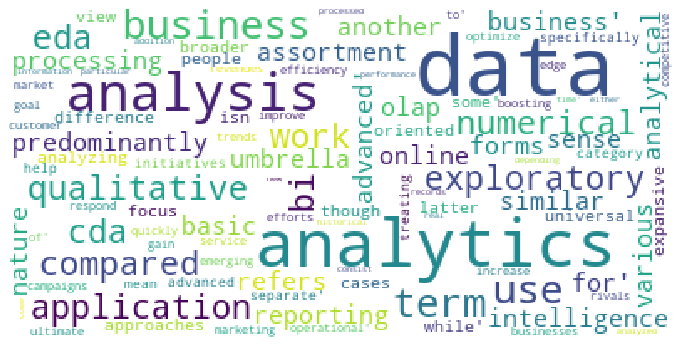

In [41]:
##wordcloud with preprocessing
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# % matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=1
                         ).generate(str(list(df['text'])))
print(wordcloud)
fig = plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [45]:
## Perform preprocessing and create Corpus 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
corpus = []
for i in range(0, len(df)):
    try : 
        
    #Remove punctuations
        text = re.sub('[^a-zA-Z]', ' ', df['text'][i])

        #remove tags
        text=re.sub("&lt;'/?.*?&gt;"," &lt;&gt; ",text)

        # remove special characters and digits
        text=re.sub("(\\d|\\W)+"," ",text)
#         print(text)

        ##Convert to list from string
        text = text.split()
        print(text)

        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text] 
        print(text)
        text = " ".join(text)
        corpus.append(text)
    except:
        print( 'noting ')

['as', 'a', 'term', 'data', 'analytics', 'predominantly', 'refers', 'to', 'an', 'assortment', 'of', 'applications', 'from', 'basic', 'business']
['a', 'a', 'term', 'data', 'analytics', 'predominantly', 'refers', 'to', 'an', 'assortment', 'of', 'application', 'from', 'basic', 'business']
['intelligence', 'bi', 'reporting', 'and', 'online', 'analytical', 'processing', 'olap', 'to', 'various', 'forms', 'of', 'advanced']
['intelligence', 'bi', 'reporting', 'and', 'online', 'analytical', 'processing', 'olap', 'to', 'various', 'form', 'of', 'advanced']
['analytics', 'in', 'that', 'sense', 'it', 's', 'similar', 'in', 'nature', 'to', 'business', 'analytics', 'another', 'umbrella', 'term', 'for']
['analytics', 'in', 'that', 'sense', 'it', 's', 'similar', 'in', 'nature', 'to', 'business', 'analytics', 'another', 'umbrella', 'term', 'for']
['approaches', 'to', 'analyzing', 'data', 'with', 'the', 'difference', 'that', 'the', 'latter', 'is', 'oriented', 'to', 'business', 'uses', 'while']
['approach

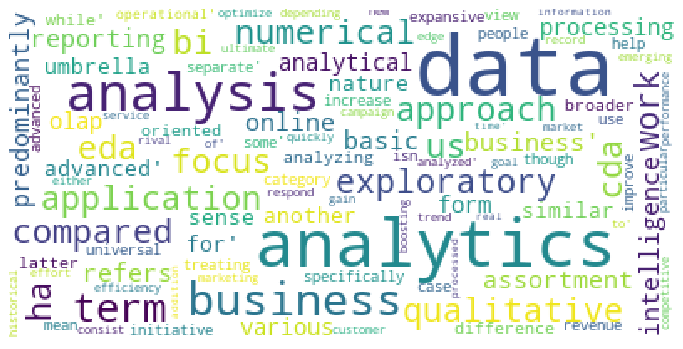

In [46]:
##wordcloud after preprocessing 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# % matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=1
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

[Text(0, 0, 'data'),
 Text(0, 0, 'to'),
 Text(0, 0, 'the'),
 Text(0, 0, 'analytics'),
 Text(0, 0, 'of'),
 Text(0, 0, 'and'),
 Text(0, 0, 'in'),
 Text(0, 0, 'analysis'),
 Text(0, 0, 'business'),
 Text(0, 0, 'that'),
 Text(0, 0, 'can'),
 Text(0, 0, 'is'),
 Text(0, 0, 'or'),
 Text(0, 0, 'term'),
 Text(0, 0, 'it'),
 Text(0, 0, 'with'),
 Text(0, 0, 'application'),
 Text(0, 0, 'from'),
 Text(0, 0, 'bi'),
 Text(0, 0, 'advanced')]

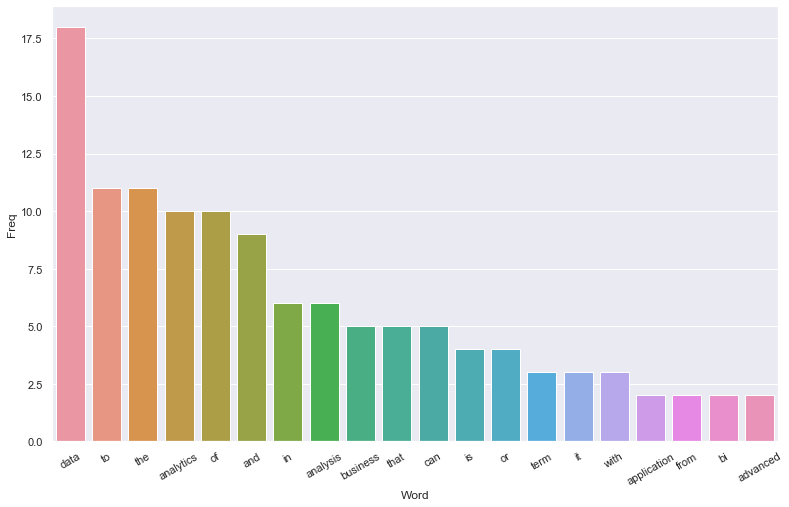

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                    Bi-gram  Freq
0            data analytics     5
1             data analysis     5
2               to business     2
3                 data with     2
4                  with the     2
5          exploratory data     2
6            numerical data     2
7                 term data     1
8   analytics predominantly     1
9      predominantly refers     1
10                refers to     1
11                    to an     1
12            an assortment     1
13            assortment of     1
14           of application     1
15         application from     1
16               from basic     1
17           basic business     1
18          intelligence bi     1
19             bi reporting     1


[Text(0, 0, 'data analytics'),
 Text(0, 0, 'data analysis'),
 Text(0, 0, 'to business'),
 Text(0, 0, 'data with'),
 Text(0, 0, 'with the'),
 Text(0, 0, 'exploratory data'),
 Text(0, 0, 'numerical data'),
 Text(0, 0, 'term data'),
 Text(0, 0, 'analytics predominantly'),
 Text(0, 0, 'predominantly refers'),
 Text(0, 0, 'refers to'),
 Text(0, 0, 'to an'),
 Text(0, 0, 'an assortment'),
 Text(0, 0, 'assortment of'),
 Text(0, 0, 'of application'),
 Text(0, 0, 'application from'),
 Text(0, 0, 'from basic'),
 Text(0, 0, 'basic business'),
 Text(0, 0, 'intelligence bi'),
 Text(0, 0, 'bi reporting')]

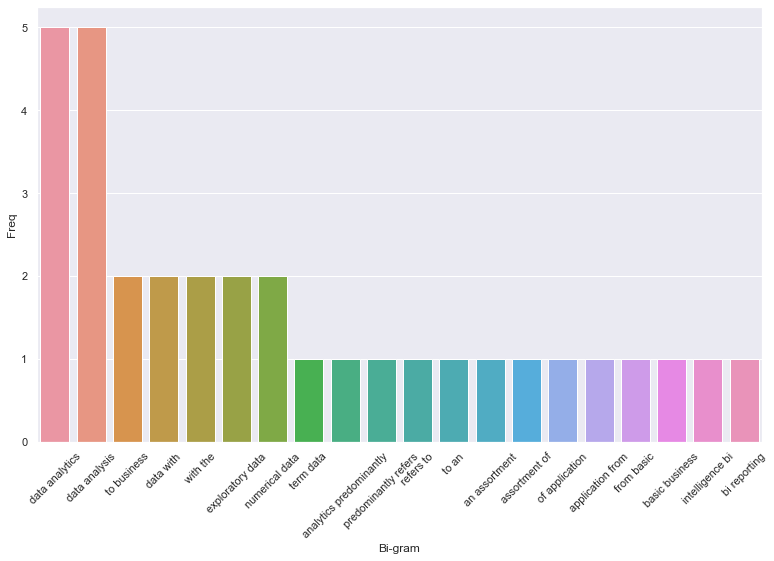

In [49]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                          Tri-gram  Freq
0        exploratory data analysis     2
1              term data analytics     1
2     data analytics predominantly     1
3   analytics predominantly refers     1
4          predominantly refers to     1
5                     refers to an     1
6                 to an assortment     1
7                 an assortment of     1
8        assortment of application     1
9              of application from     1
10          application from basic     1
11             from basic business     1
12       intelligence bi reporting     1
13                bi reporting and     1
14            reporting and online     1
15           and online analytical     1
16    online analytical processing     1
17      analytical processing olap     1
18              processing olap to     1
19                 olap to various     1


[Text(0, 0, 'exploratory data analysis'),
 Text(0, 0, 'term data analytics'),
 Text(0, 0, 'data analytics predominantly'),
 Text(0, 0, 'analytics predominantly refers'),
 Text(0, 0, 'predominantly refers to'),
 Text(0, 0, 'refers to an'),
 Text(0, 0, 'to an assortment'),
 Text(0, 0, 'an assortment of'),
 Text(0, 0, 'assortment of application'),
 Text(0, 0, 'of application from'),
 Text(0, 0, 'application from basic'),
 Text(0, 0, 'from basic business'),
 Text(0, 0, 'intelligence bi reporting'),
 Text(0, 0, 'bi reporting and'),
 Text(0, 0, 'reporting and online'),
 Text(0, 0, 'and online analytical'),
 Text(0, 0, 'online analytical processing'),
 Text(0, 0, 'analytical processing olap'),
 Text(0, 0, 'processing olap to'),
 Text(0, 0, 'olap to various')]

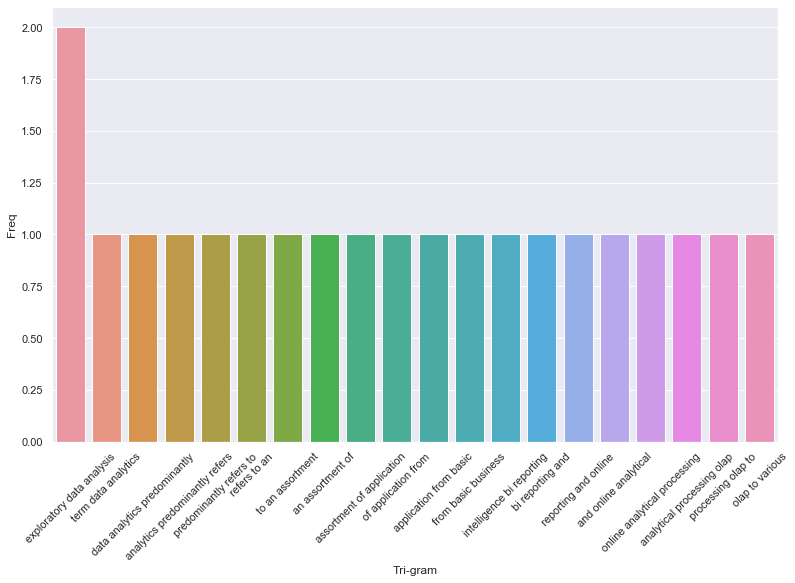

In [50]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

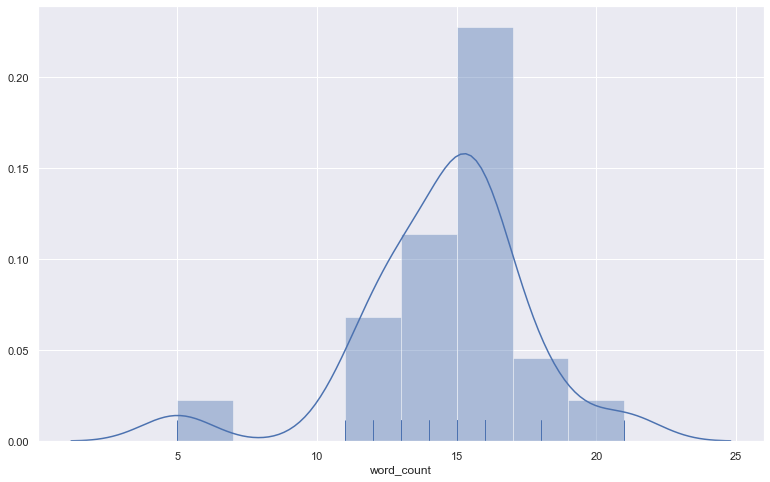

In [51]:
##disterbuted of word count 
import seaborn as sns
sns.distplot(df['word_count'], kde=True, rug=True);

# What is the probability of the word “analytics” occurring after the word “data” ?

In [82]:
###list of bigram words in corpus
top2_df

,Bi-gram,Freq
0,data analytics,5
1,data analysis,5
2,to business,2
3,data with,2
4,with the,2
5,exploratory data,2
6,numerical data,2
7,term data,1
8,analytics predominantly,1
9,predominantly refers,1


In [90]:
## number of bigram data analytic 
int(top2_df[top2_df['Bi-gram']=='data analytics']['Freq'])


5

In [87]:
### Just can see analytic word 
int(top_df[top_df['Word']=='analytics']['Freq'])

10

In [89]:
###Probablity = number data analytic / just have analytic 
prob = int(top2_df[top2_df['Bi-gram']=='data analytics']['Freq'])/int(top_df[top_df['Word']=='analytics']['Freq'])
print('probablity of analytics appearing after data: {}'.format(prob))

probablity of analytics appearing after data: 0.5
